In [225]:
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from scipy import stats

from useful_functions import *

In [226]:
tables_to_join = ["tPlantNutrients", "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df.shape

(158, 26)

In [227]:
full_df.head(10)

,sample_id,N_percent_dm,P_percent_dm,K_percent_dm,Ca_percent_dm,Mg_percent_dm,Na_percent_dm,S_percent_dm,Zn_ppm_dm,Mn_ppm_dm,...,collect_date,sample_id,V1,V2,species,PC1,PC2,PC3,PC4,PC5
0,RRL1,NaN,0.21,4.01,0.83,0.29,0.01,0.37,29.0,281.0,...,6/25/2021,RRL1,0.753244,0.246756,exaltata,0.194769,0.048276,-0.023880,-0.017138,-0.039842
1,RRL2,2.24,0.16,5.34,1.05,0.32,0.01,0.29,20.0,423.0,...,6/25/2021,RRL2,0.708412,0.291588,exaltata,0.154924,0.071277,0.000923,-0.025830,0.005592
2,RRL3,NaN,0.20,4.75,0.63,0.27,0.04,0.22,21.0,469.0,...,6/25/2021,RRL3,0.778046,0.221954,exaltata,0.187750,0.035009,-0.016006,-0.012529,-0.011169
3,RRL4,NaN,0.18,4.74,1.25,0.32,0.01,0.28,18.0,680.0,...,6/25/2021,RRL4,0.720367,0.279633,exaltata,0.167167,0.046053,-0.032754,-0.016192,-0.028988
4,RRL5,3.00,0.26,3.51,1.20,0.44,0.01,0.29,29.0,507.0,...,6/25/2021,RRL5,0.572487,0.427513,exaltata,0.099801,0.089800,0.000613,-0.004979,0.017524
5,RRL6,3.26,0.19,2.55,0.73,0.50,0.01,0.28,21.0,324.0,...,6/25/2021,RRL6,0.653961,0.346039,exaltata,0.128610,0.076955,0.020429,-0.053479,0.015590
6,RRL7,NaN,0.21,3.67,0.88,0.22,0.01,0.32,17.0,509.0,...,6/25/2021,RRL7,0.775482,0.224518,exaltata,0.184532,0.031368,-0.018565,0.016763,-0.017642
7,RRL9,3.39,0.18,3.23,0.65,0.30,0.01,0.35,17.0,476.0,...,6/25/2021,RRL9,0.581366,0.418634,exaltata,0.097719,0.094733,-0.006560,0.012822,-0.022248
8,RRL10,NaN,0.18,3.29,1.37,0.38,0.01,0.28,28.0,538.0,...,6/25/2021,RRL10,0.592773,0.407227,exaltata,0.113937,0.086560,-0.018321,0.007765,-0.027255
9,RRL11,3.28,0.22,2.56,0.64,0.30,0.01,0.30,26.0,432.0,...,6/25/2021,RRL11,0.584173,0.415827,exaltata,0.106894,0.088742,0.007519,-0.007988,0.002289


In [228]:
#drop duplicate columns
df = full_df
df = df.T.drop_duplicates().T
df.shape

(158, 24)

In [229]:
nutrients = df.columns
nutrients = nutrients.drop(['sample_id', 'site_id', 'collect_date', 'V1','V2','PC1','PC2','PC3','PC4','PC5', 'species'])

In [230]:
nutrients

Index(['N_percent_dm', 'P_percent_dm', 'K_percent_dm', 'Ca_percent_dm',
       'Mg_percent_dm', 'Na_percent_dm', 'S_percent_dm', 'Zn_ppm_dm',
       'Mn_ppm_dm', 'Fe_ppm_dm', 'Cu_ppm_dm', 'B_ppm_dm', 'Al_ppm_dm'],
      dtype='object')

## Boxplots of Plant Nutrients by Site

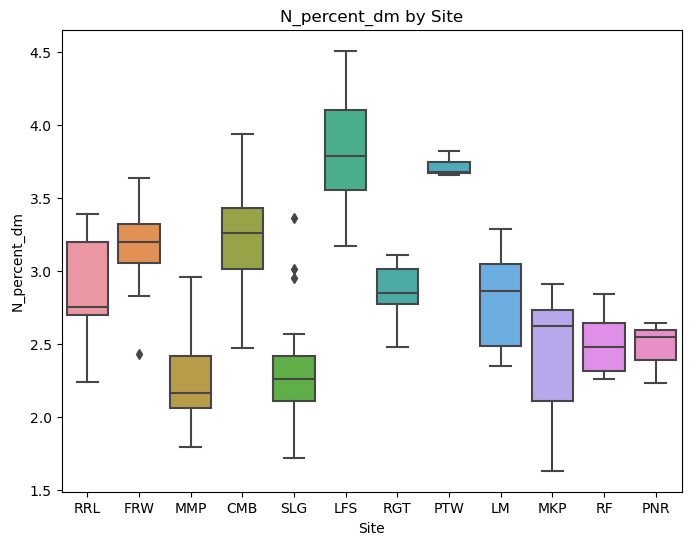

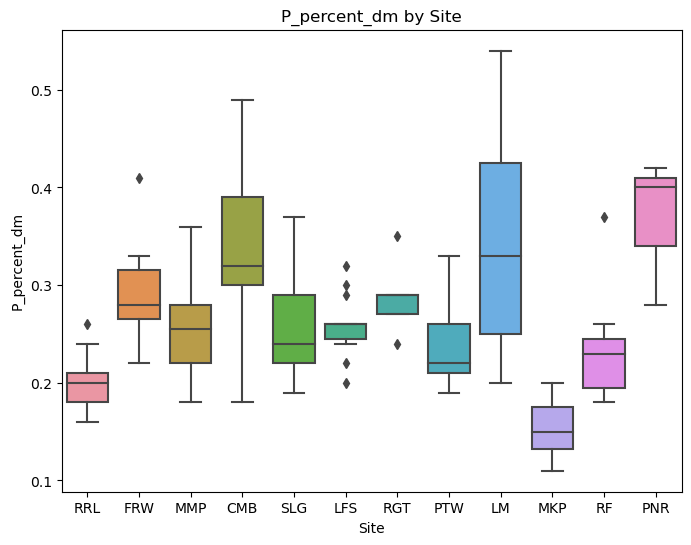

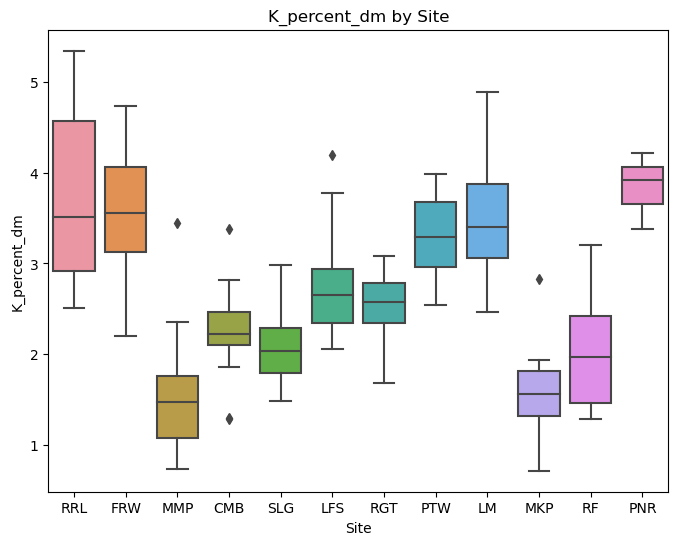

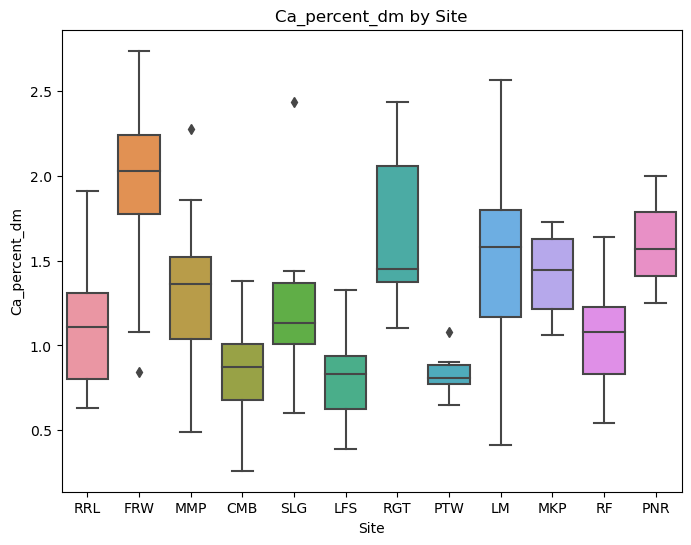

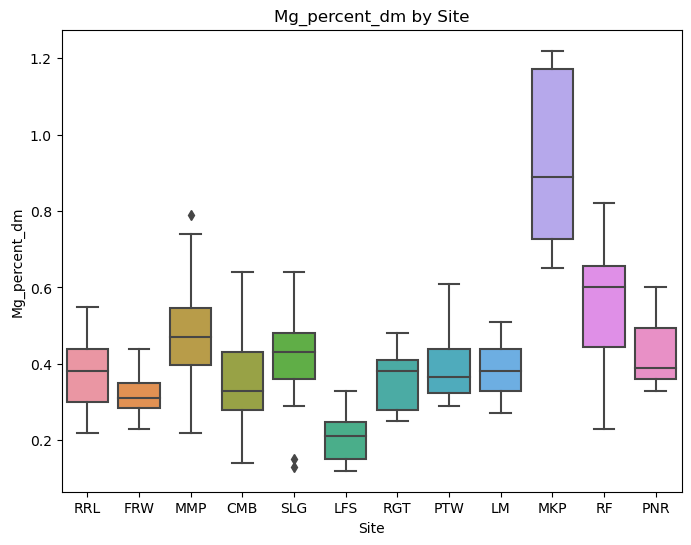

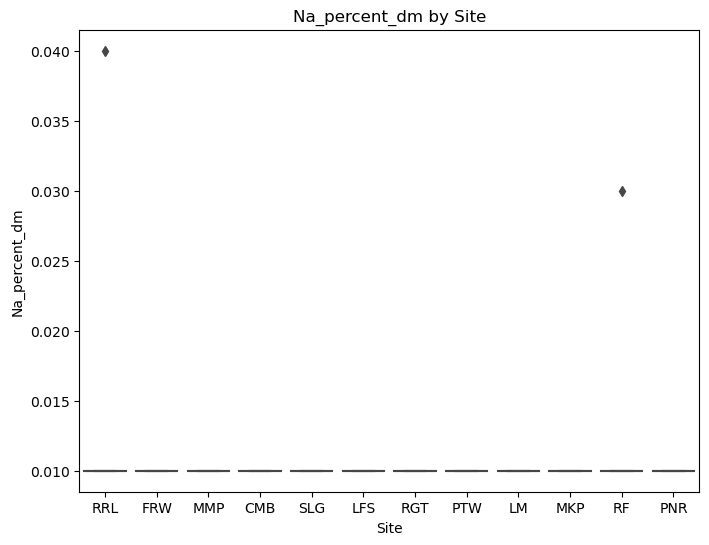

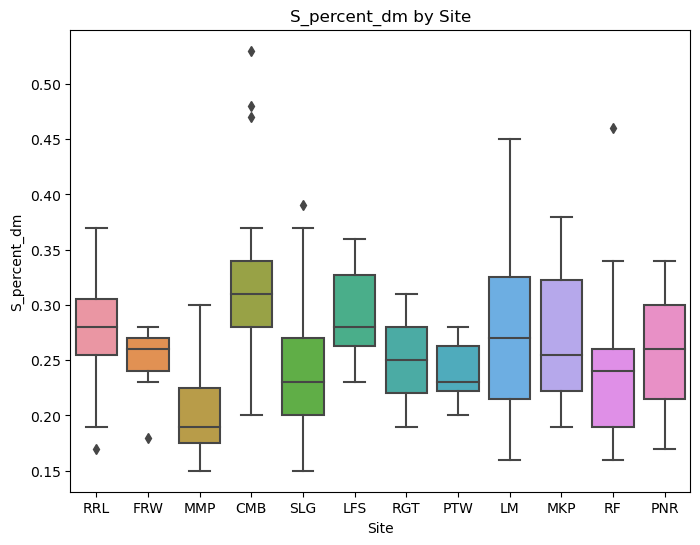

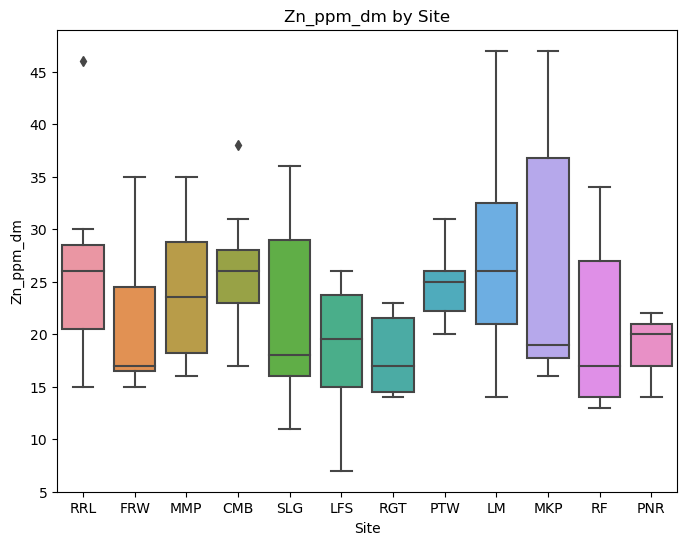

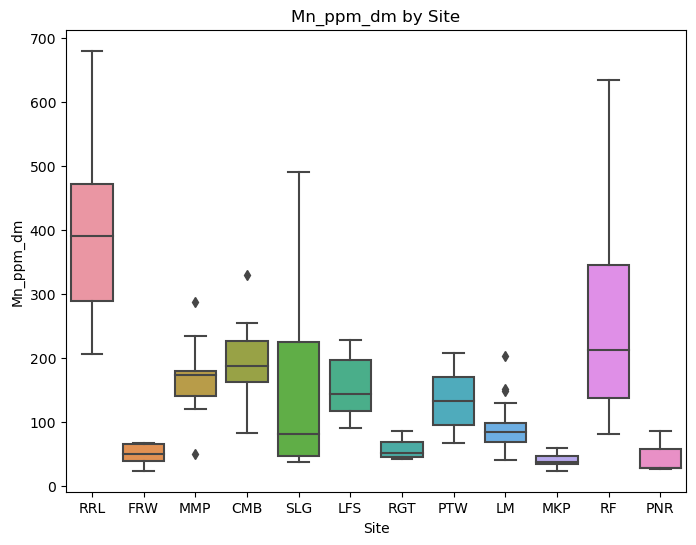

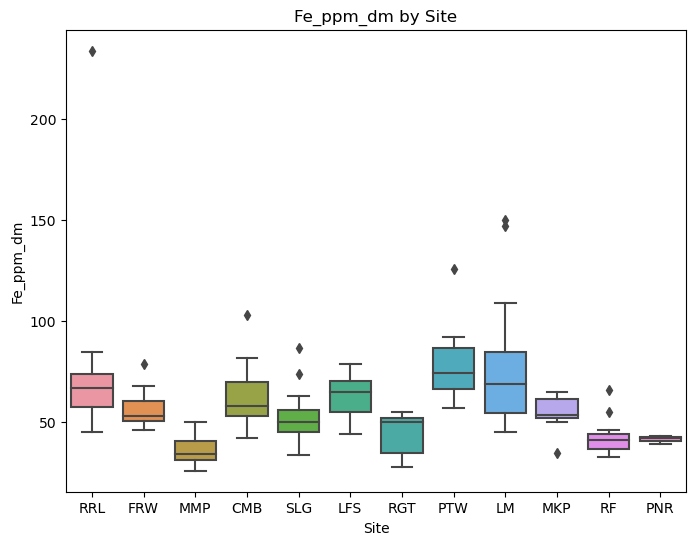

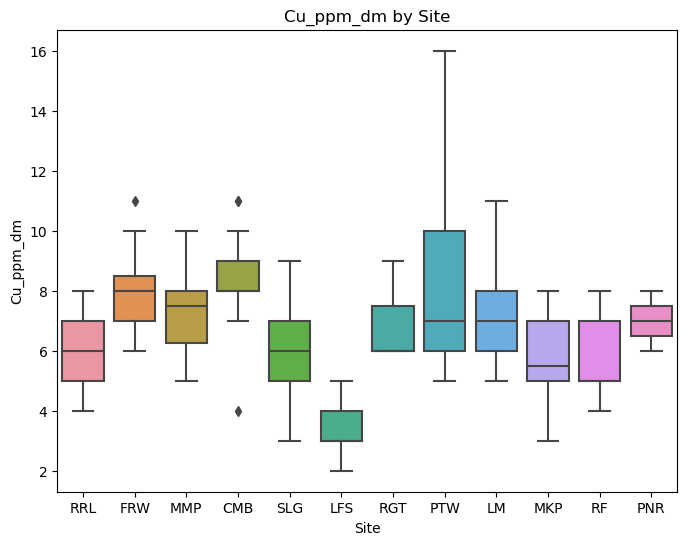

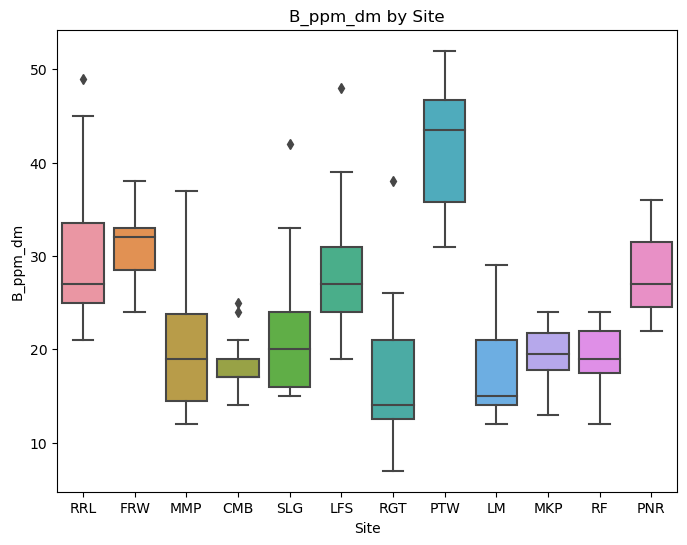

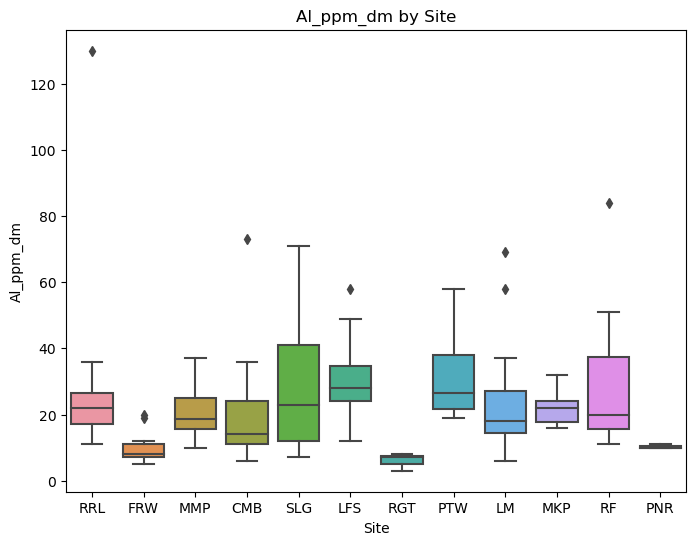

In [231]:
for i in nutrients:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='site_id', y=i, data=df)
    plt.title(i + ' by Site')
    plt.xlabel('Site')
    plt.ylabel(i)
    plt.show()

## Boxplot of Plant Nutrients by Plant Species

In [208]:
subdf = df[df["species"].isin(['syriaca', 'exaltata'])]
subdf.shape

(154, 24)

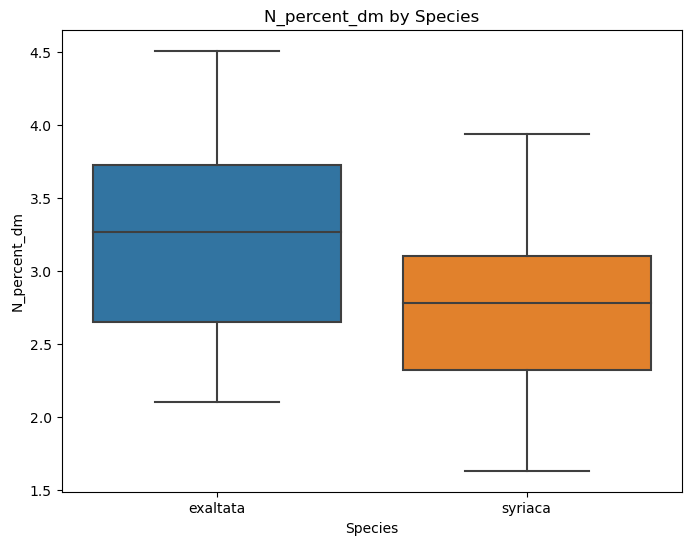

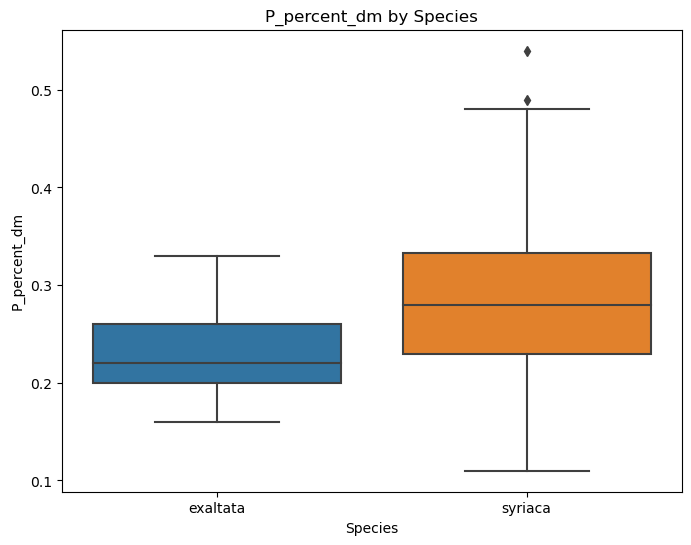

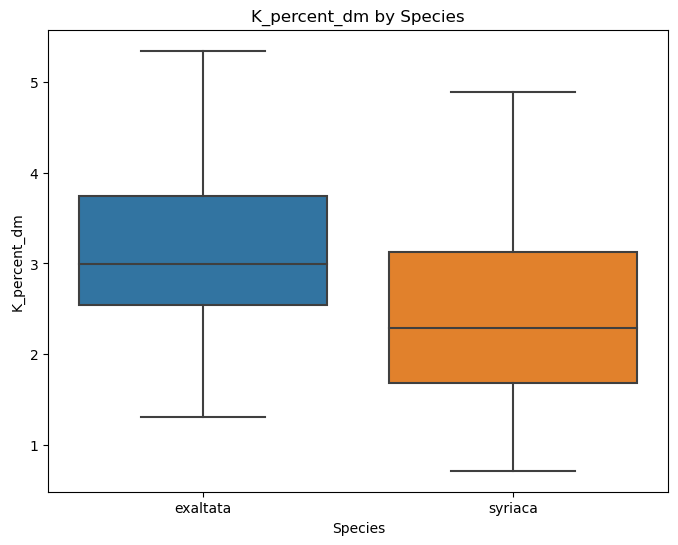

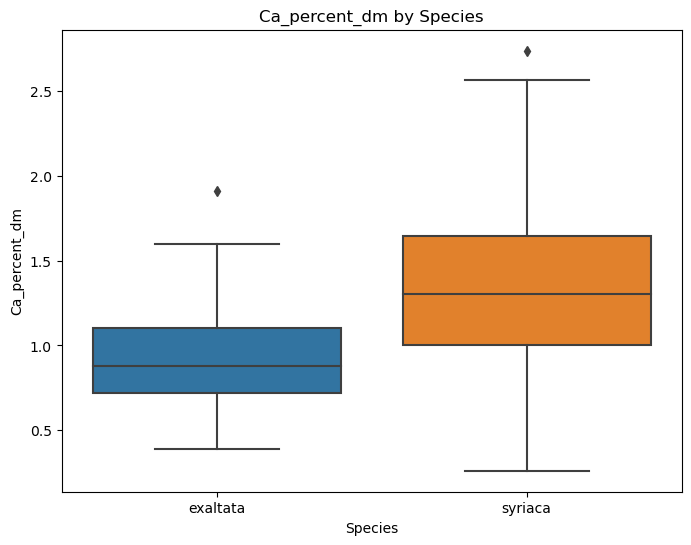

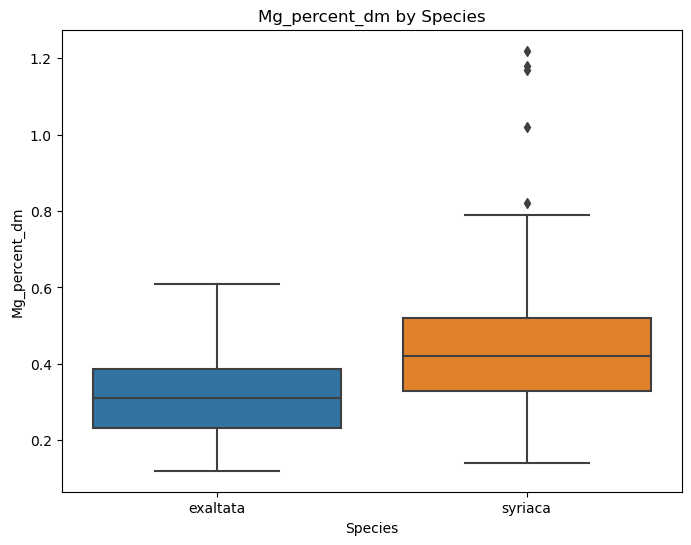

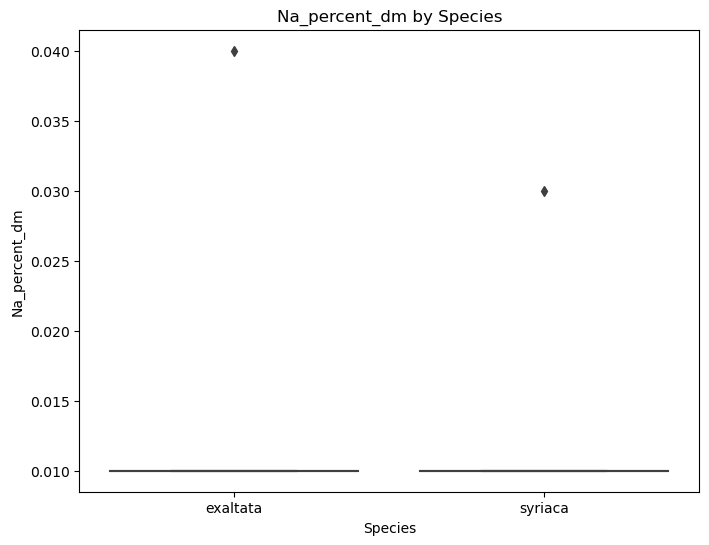

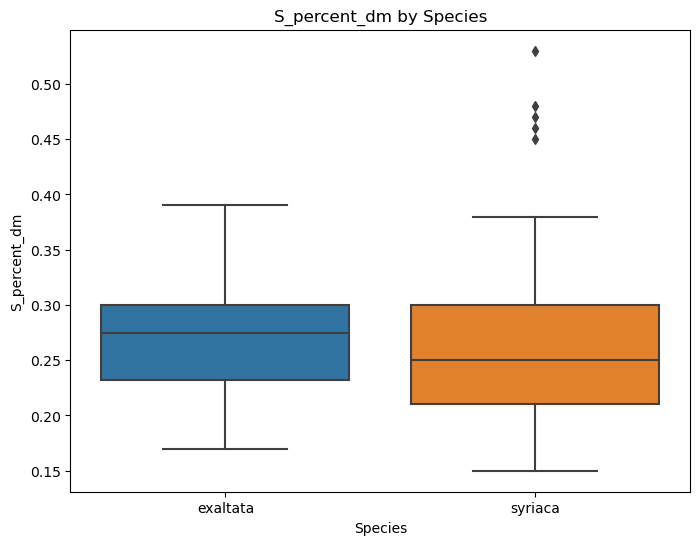

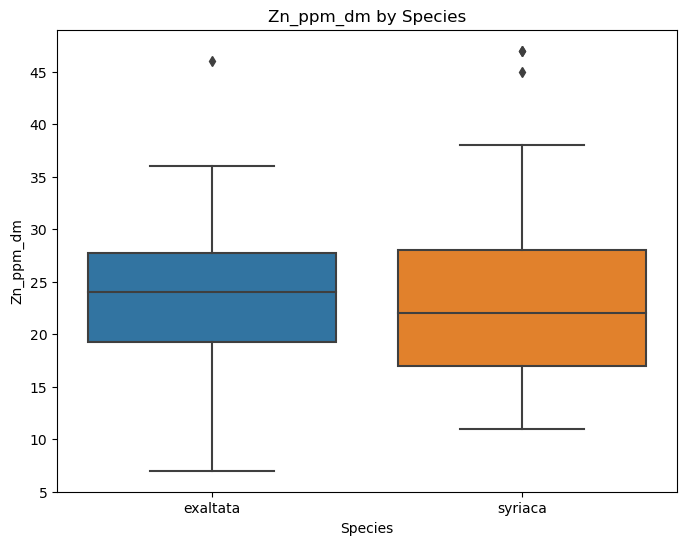

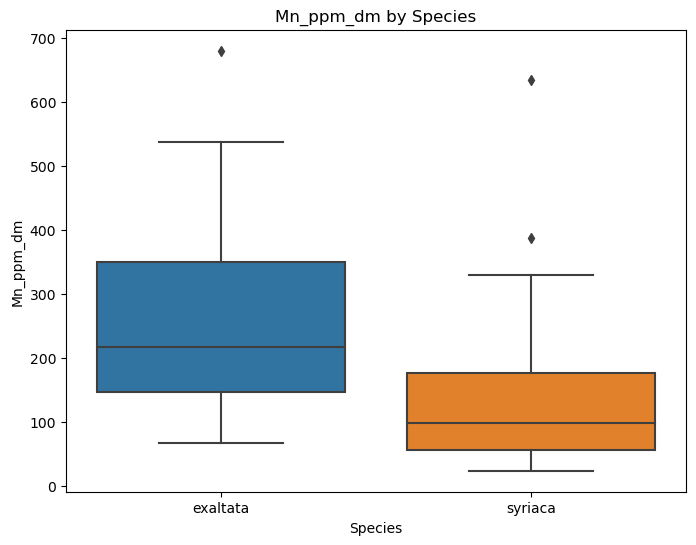

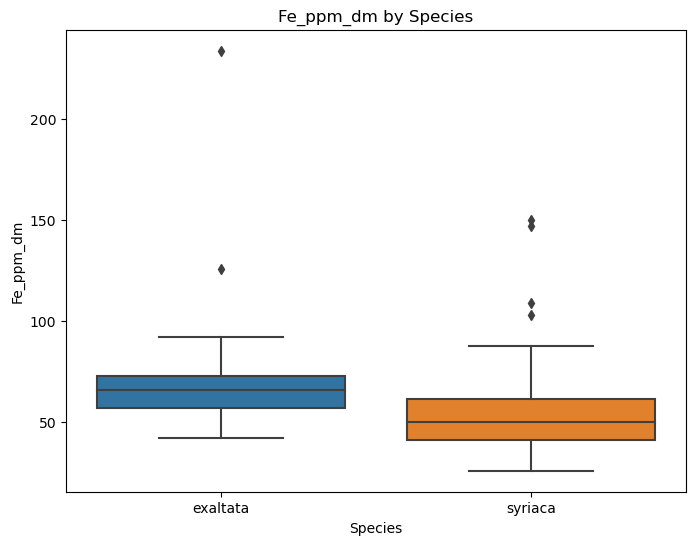

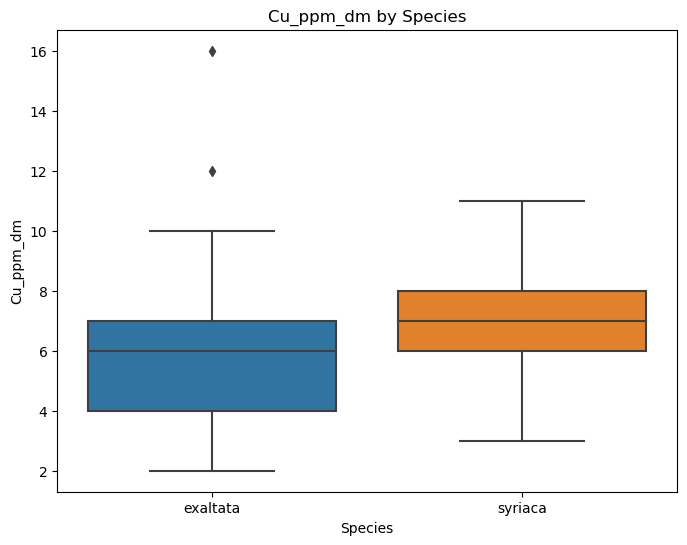

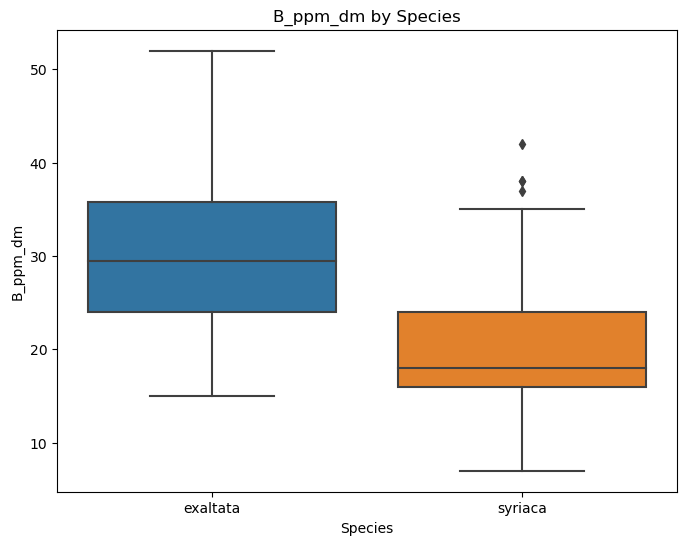

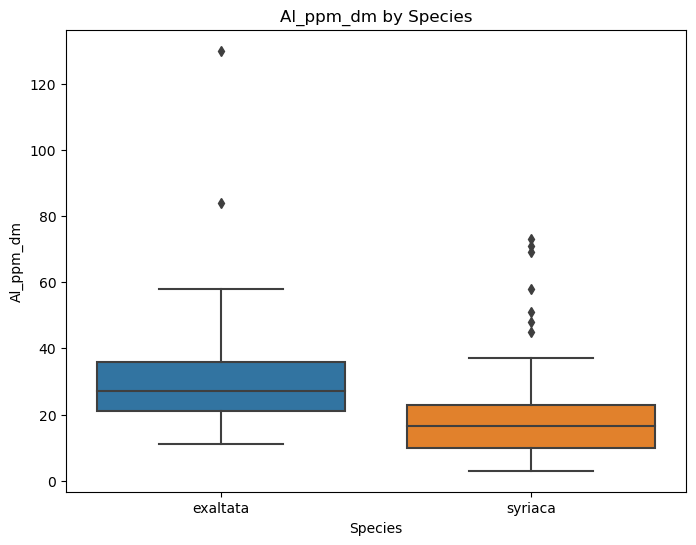

In [209]:
for i in nutrients:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='species', y=i, data=subdf)
    plt.title(i + ' by Species')
    plt.xlabel('Species')
    plt.ylabel(i)
    plt.show()

## Scatter Plots of V2 vs. Nutrients

### Scatterplot for Nitrogen for dropping Rows

In [223]:
nitrogen_spdf = subdf.dropna()

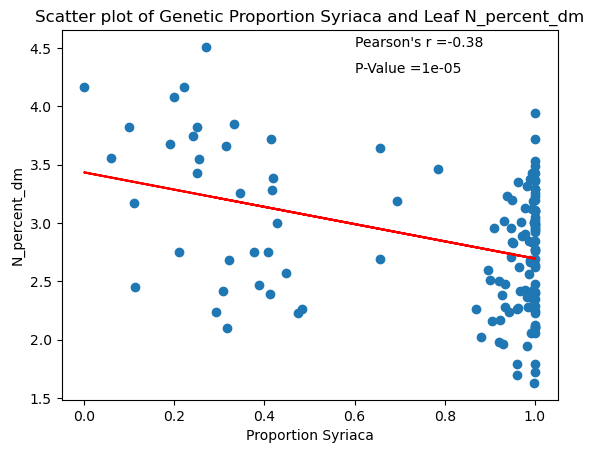

Al_ppm_dm
Correlation coefficient value: -0.3777019859918462
Correlation P-Value: 6.297973040330677e-06


In [233]:
x_data = nitrogen_spdf['V2'].astype(float)
y_data = nitrogen_spdf['N_percent_dm'].astype(float)
corel_coef, p_value = stats.pearsonr(x_data, y_data)
    
# Perform linear regression to calculate the best-fit line
slope, intercept = np.polyfit(x_data, y_data, 1)

# Create a scatter plot
plt.scatter(x_data, y_data, label='Data Points')

# Create the best-fit line using the slope and intercept
best_fit_line = [slope * x + intercept for x in x_data]

# Plot the best-fit line
plt.plot(x_data, best_fit_line, color='red', label='Best Fit Line')

# Add labels and a legend
plt.xlabel('Proportion Syriaca')
plt.ylabel('N_percent_dm')
#plt.legend()

# Show the plot
plt.title(f'Scatter plot of Genetic Proportion Syriaca and Leaf N_percent_dm')

if p_value < 0.05:
    plt.text(x_data.max()-.4, y_data.max(), f"Pearson's r ={round(corel_coef,2)}")
    plt.text(x_data.max()-.4, y_data.max()*.95, f"P-Value ={round(p_value, 5)}")

plt.show()

print(i)
print(f'Correlation coefficient value: {corel_coef}')
print(f'Correlation P-Value: {p_value}')

### Scatterplots for the rest of the nutrients

In [234]:
spdf = subdf

In [235]:
no_nitrogen = nutrients.drop('N_percent_dm')

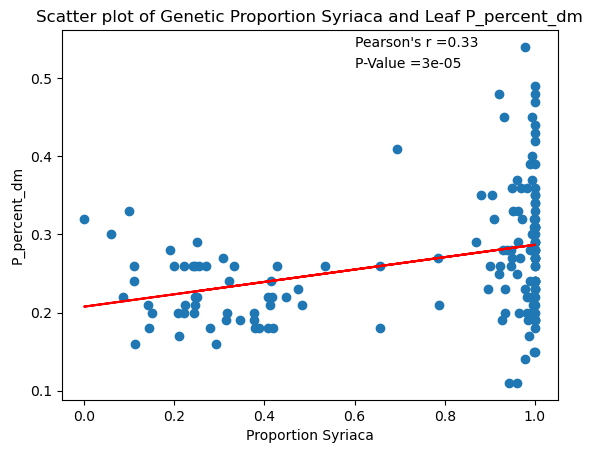

P_percent_dm
Correlation coefficient value: 0.33095331403801237
Correlation P-Value: 2.7611405882954678e-05


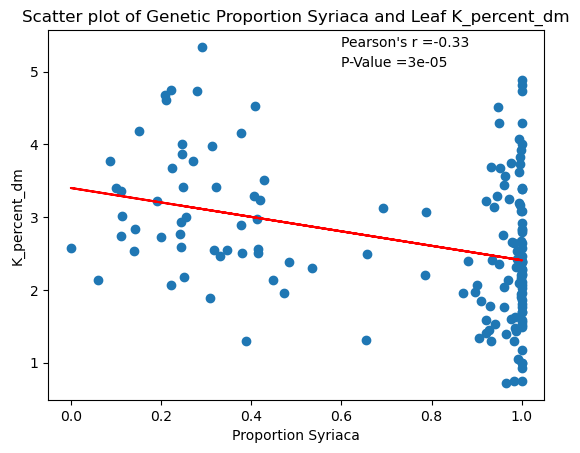

K_percent_dm
Correlation coefficient value: -0.33172421295001175
Correlation P-Value: 2.637750414785177e-05


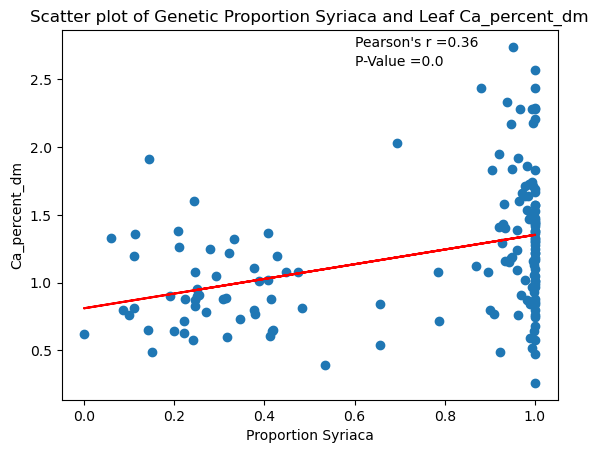

Ca_percent_dm
Correlation coefficient value: 0.3628140816805781
Correlation P-Value: 3.759012221813593e-06


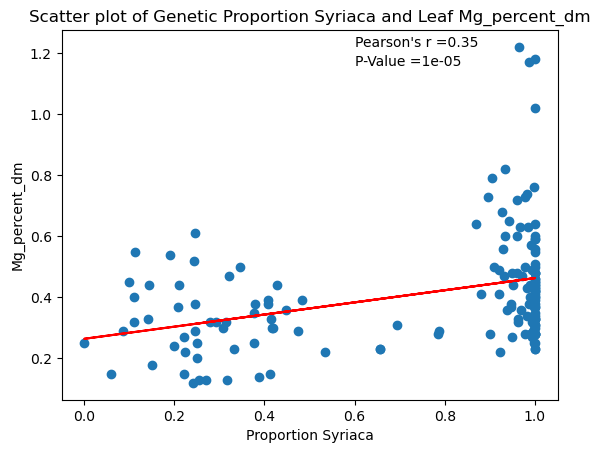

Mg_percent_dm
Correlation coefficient value: 0.35096869100838357
Correlation P-Value: 8.09256538536148e-06


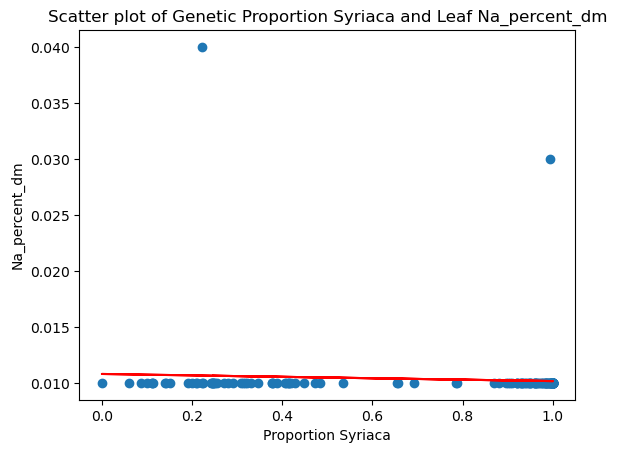

Na_percent_dm
Correlation coefficient value: -0.07327350035878721
Correlation P-Value: 0.3664693393801553


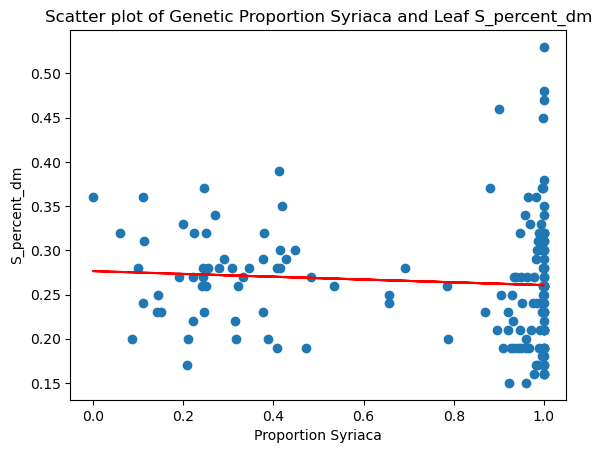

S_percent_dm
Correlation coefficient value: -0.07706390703646887
Correlation P-Value: 0.3421326193574561


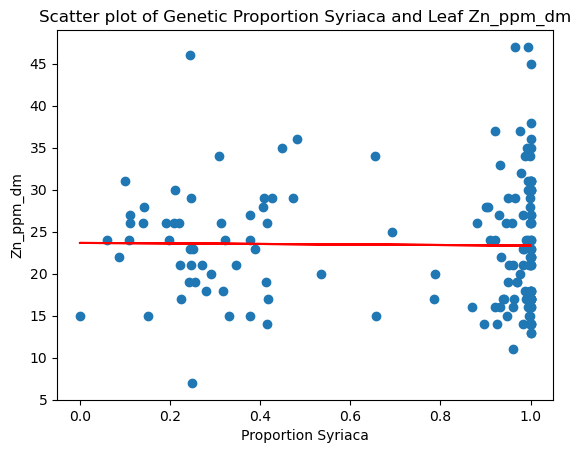

Zn_ppm_dm
Correlation coefficient value: -0.013979393262277463
Correlation P-Value: 0.8633787927006644


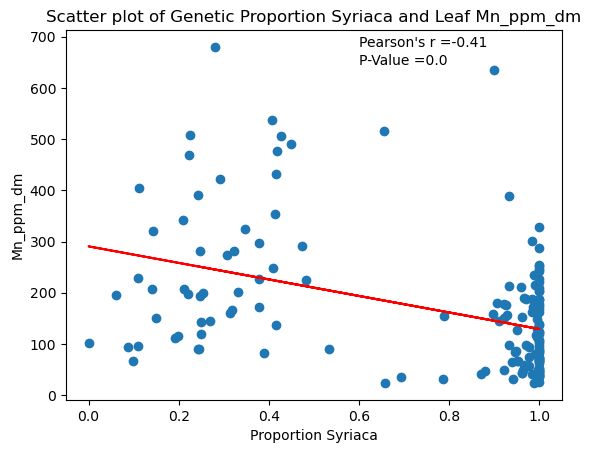

Mn_ppm_dm
Correlation coefficient value: -0.4132405778669548
Correlation P-Value: 1.0016721213939321e-07


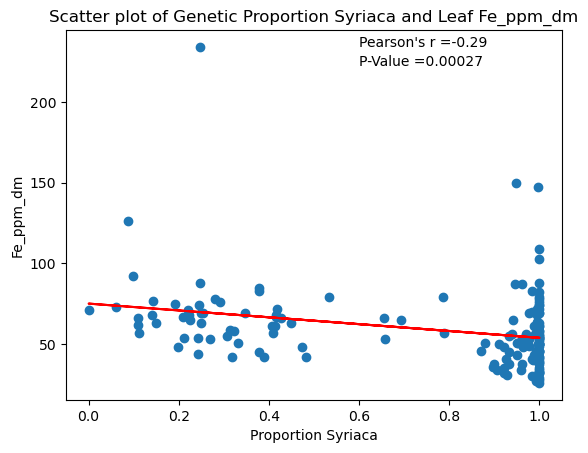

Fe_ppm_dm
Correlation coefficient value: -0.28922864113160196
Correlation P-Value: 0.00027469816645450445


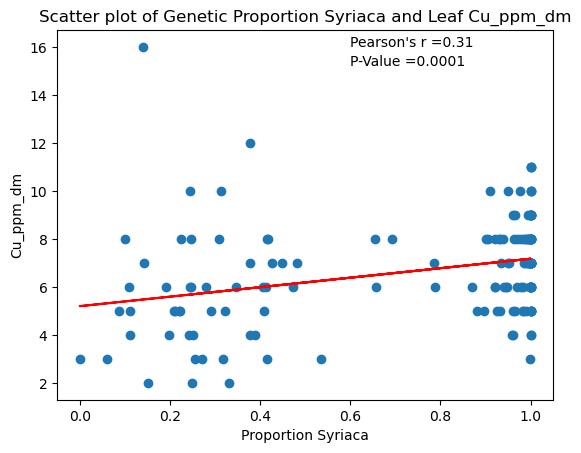

Cu_ppm_dm
Correlation coefficient value: 0.3090316138128935
Correlation P-Value: 9.63406074953417e-05


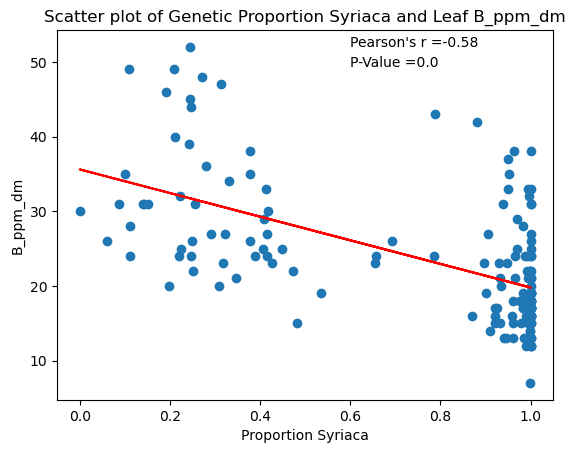

B_ppm_dm
Correlation coefficient value: -0.5773580646933087
Correlation P-Value: 4.57095964886463e-15


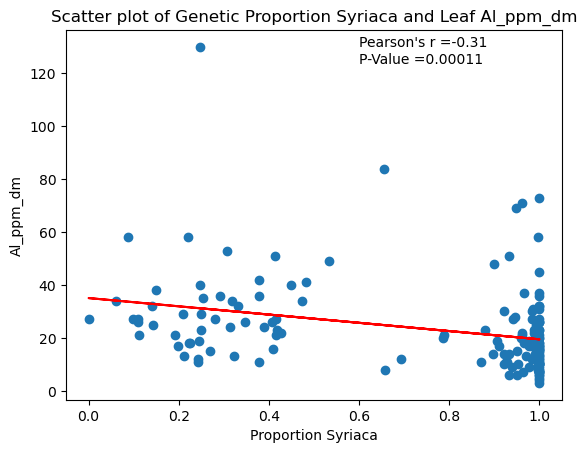

Al_ppm_dm
Correlation coefficient value: -0.30696080913827284
Correlation P-Value: 0.00010787766724491887


In [236]:
x_data = spdf['V2'].astype(float)

for i in no_nitrogen:
    y_data = spdf[i].astype(float)
    
    corel_coef, p_value = stats.pearsonr(x_data, y_data)
    
    # Perform linear regression to calculate the best-fit line
    slope, intercept = np.polyfit(x_data, y_data, 1)

    # Create a scatter plot
    plt.scatter(x_data, y_data, label='Data Points')

    # Create the best-fit line using the slope and intercept
    best_fit_line = [slope * x + intercept for x in x_data]

    # Plot the best-fit line
    plt.plot(x_data, best_fit_line, color='red', label='Best Fit Line')

    # Add labels and a legend
    plt.xlabel('Proportion Syriaca')
    plt.ylabel(i)
    #plt.legend()

    # Show the plot
    plt.title(f'Scatter plot of Genetic Proportion Syriaca and Leaf {i}')
    
    if p_value < 0.05:
        plt.text(x_data.max()-.4, y_data.max(), f"Pearson's r ={round(corel_coef,2)}")
        plt.text(x_data.max()-.4, y_data.max()*.95, f"P-Value ={round(p_value, 5)}")
    
    plt.show()
    
    print(i)
    print(f'Correlation coefficient value: {corel_coef}')
    print(f'Correlation P-Value: {p_value}')

## T-Test between Syriaca and Exaltata Plant Nutrients

### With NaN included

In [219]:
def Average(lst):
    return sum(lst) / len(lst)

In [220]:
for nutrient in nutrients:
    df1 = df[["species",nutrient]]

    s = list(df1.loc[df1["species"].eq("syriaca")][nutrient].to_numpy())
    e = list(df1.loc[df1["species"].eq("exaltata")][nutrient].to_numpy())
    
    #if stats.ttest_ind(s,e)[1] < 0.05:
    print(nutrient)
    print(f'Syriaca Mean {Average(s)}')
    print(f'Exaltata Mean {Average(e)}')
    print(stats.ttest_ind(s,e))
    print('')

N_percent_dm
Syriaca Mean nan
Exaltata Mean nan
TtestResult(statistic=nan, pvalue=nan, df=nan)

P_percent_dm
Syriaca Mean 0.2867307692307693
Exaltata Mean 0.22520000000000004
TtestResult(statistic=4.796172888363872, pvalue=3.8243033406987164e-06, df=152.0)

K_percent_dm
Syriaca Mean 2.4263461538461533
Exaltata Mean 3.1409999999999996
TtestResult(statistic=-4.403936788898745, pvalue=1.9949786527992162e-05, df=152.0)

Ca_percent_dm
Syriaca Mean 1.35375
Exaltata Mean 0.9289999999999998
TtestResult(statistic=5.393687284707425, pvalue=2.5911551607587784e-07, df=152.0)

Mg_percent_dm
Syriaca Mean 0.45894230769230787
Exaltata Mean 0.31720000000000004
TtestResult(statistic=4.646357681125192, pvalue=7.26852912479309e-06, df=152.0)

Na_percent_dm
Syriaca Mean 0.010192307692307698
Exaltata Mean 0.010600000000000005
TtestResult(statistic=-0.8169661398691596, pvalue=0.4152264072238798, df=152.0)

S_percent_dm
Syriaca Mean 0.26067307692307695
Exaltata Mean 0.27279999999999993
TtestResult(statistic=-

### After dropping NaN

In [221]:
df = df.dropna()

In [222]:
for nutrient in nutrients:
    df1 = df[["species",nutrient]]

    s = list(df1.loc[df1["species"].eq("syriaca")][nutrient].to_numpy())
    e = list(df1.loc[df1["species"].eq("exaltata")][nutrient].to_numpy())
    
    #if stats.ttest_ind(s,e)[1] < 0.05:
    print(nutrient)
    print(f'Syriaca Mean {Average(s)}')
    print(f'Exaltata Mean {Average(e)}')
    print(stats.ttest_ind(s,e))
    print('')

N_percent_dm
Syriaca Mean 2.728252427184466
Exaltata Mean 3.1921875
TtestResult(statistic=-4.146365136118009, pvalue=5.981679139135237e-05, df=133.0)

P_percent_dm
Syriaca Mean 0.2876699029126214
Exaltata Mean 0.2340625
TtestResult(statistic=3.3812372462574474, pvalue=0.0009477432778971179, df=133.0)

K_percent_dm
Syriaca Mean 2.4402912621359216
Exaltata Mean 2.970625
TtestResult(statistic=-2.7643034708096463, pvalue=0.006514515868904237, df=133.0)

Ca_percent_dm
Syriaca Mean 1.3544660194174756
Exaltata Mean 0.9131249999999999
TtestResult(statistic=4.662372355577227, pvalue=7.5078894455094e-06, df=133.0)

Mg_percent_dm
Syriaca Mean 0.459611650485437
Exaltata Mean 0.30062500000000003
TtestResult(statistic=4.244462256078231, pvalue=4.082428402372664e-05, df=133.0)

Na_percent_dm
Syriaca Mean 0.01019417475728156
Exaltata Mean 0.010000000000000004
TtestResult(statistic=0.5559475741076053, pvalue=0.5791807578469128, df=133.0)

S_percent_dm
Syriaca Mean 0.26135922330097094
Exaltata Mean 0.28

C:\Users\15404\anaconda3.1\envs\research_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



## Data Setup For PCA

In [255]:
newdf = full_df
newdf = newdf.T.drop_duplicates().T
#newdf = newdf.dropna()
newdf[nutrients] = StandardScaler().fit_transform(newdf[nutrients])  

In [256]:
newdf.head()

,sample_id,N_percent_dm,P_percent_dm,K_percent_dm,Ca_percent_dm,Mg_percent_dm,Na_percent_dm,S_percent_dm,Zn_ppm_dm,Mn_ppm_dm,...,site_id,collect_date,V1,V2,species,PC1,PC2,PC3,PC4,PC5
0,RRL1,NaN,-0.738864,1.354181,-0.773433,-0.655431,-0.111002,1.499691,0.762893,0.880423,...,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
1,RRL2,-1.025087,-1.365154,2.697114,-0.334574,-0.494460,-0.111002,0.352922,-0.464294,1.977760,...,RRL,6/25/2021,0.708412,0.291588,exaltata,0.154924,0.071277,0.000923,-0.02583,0.005592
2,RRL3,NaN,-0.864122,2.101377,-1.172396,-0.762745,10.411944,-0.650501,-0.327940,2.333235,...,RRL,6/25/2021,0.778046,0.221954,exaltata,0.18775,0.035009,-0.016006,-0.012529,-0.011169
3,RRL4,NaN,-1.114638,2.091279,0.064390,-0.494460,-0.111002,0.209576,-0.737003,3.963785,...,RRL,6/25/2021,0.720367,0.279633,exaltata,0.167167,0.046053,-0.032754,-0.016192,-0.028988
4,RRL5,0.281845,-0.112574,0.849319,-0.035351,0.149425,-0.111002,0.352922,0.762893,2.626888,...,RRL,6/25/2021,0.572487,0.427513,exaltata,0.099801,0.0898,0.000613,-0.004979,0.017524


## PCA of Plant Nutrient by Site

### PCAs without Nitrogen (Due to NaN)

In [257]:
no_nitrogen = nutrients.drop('N_percent_dm')

In [265]:
X = newdf[no_nitrogen]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=newdf['site_id'])
fig.update_layout(
    title = "Plant Nutrients by Site Not Including Nitrogen PCA",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

### PCA with Nitrogen by dropping Nan Rows

In [264]:
no_nan_df = newdf.dropna()
X = no_nan_df[nutrients]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=no_nan_df['site_id'])
fig.update_layout(
    title = "Plant Nutrients by Site including Nitrogen PCA",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

In [270]:
no_nan_df[nutrients].shape

(136, 13)

## TSNE of Plant Nutrients by Site

In [268]:
newdf[no_nitrogen].shape

(158, 12)

### TSNE without Nitrogen

In [271]:
perplexity_value = 10 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(newdf[no_nitrogen])

fig = px.scatter(tsne_transformed, x=0, y=1, color=newdf['site_id'])
fig.update_layout(title = 'Plant Nutrients excluding Nitrogen by Site TSNE Perplexity-Value = ' + str(perplexity_value))
fig.show()

### TSNE with Nitrogen

In [272]:
perplexity_value = 10 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(no_nan_df[nutrients])

fig = px.scatter(tsne_transformed, x=0, y=1, color=no_nan_df['site_id'])
fig.update_layout(title = 'Plant Nutrients Including Nitrogen by Site TSNE Perplexity-Value =' + str(perplexity_value))
fig.show()

## PCA of Plant Nutrients by Species

In [263]:
subdf = newdf[newdf["species"].isin(['syriaca', 'exaltata'])]
subdf.shape

(154, 24)

In [273]:
subdf.head()

,sample_id,N_percent_dm,P_percent_dm,K_percent_dm,Ca_percent_dm,Mg_percent_dm,Na_percent_dm,S_percent_dm,Zn_ppm_dm,Mn_ppm_dm,...,site_id,collect_date,V1,V2,species,PC1,PC2,PC3,PC4,PC5
0,RRL1,NaN,-0.738864,1.354181,-0.773433,-0.655431,-0.111002,1.499691,0.762893,0.880423,...,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
1,RRL2,-1.025087,-1.365154,2.697114,-0.334574,-0.494460,-0.111002,0.352922,-0.464294,1.977760,...,RRL,6/25/2021,0.708412,0.291588,exaltata,0.154924,0.071277,0.000923,-0.02583,0.005592
2,RRL3,NaN,-0.864122,2.101377,-1.172396,-0.762745,10.411944,-0.650501,-0.327940,2.333235,...,RRL,6/25/2021,0.778046,0.221954,exaltata,0.18775,0.035009,-0.016006,-0.012529,-0.011169
3,RRL4,NaN,-1.114638,2.091279,0.064390,-0.494460,-0.111002,0.209576,-0.737003,3.963785,...,RRL,6/25/2021,0.720367,0.279633,exaltata,0.167167,0.046053,-0.032754,-0.016192,-0.028988
4,RRL5,0.281845,-0.112574,0.849319,-0.035351,0.149425,-0.111002,0.352922,0.762893,2.626888,...,RRL,6/25/2021,0.572487,0.427513,exaltata,0.099801,0.0898,0.000613,-0.004979,0.017524


In [274]:
nutrients

Index(['N_percent_dm', 'P_percent_dm', 'K_percent_dm', 'Ca_percent_dm',
       'Mg_percent_dm', 'Na_percent_dm', 'S_percent_dm', 'Zn_ppm_dm',
       'Mn_ppm_dm', 'Fe_ppm_dm', 'Cu_ppm_dm', 'B_ppm_dm', 'Al_ppm_dm'],
      dtype='object')

### Plant Nutrients Excluding Nitrogen via Dropping Column

In [280]:
X = subdf[nutrients].drop(['N_percent_dm'], axis = 1)

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=subdf['species'])
fig.update_layout(
    title = "Plant Nutrients by Species PCA Excluding Nitrogen",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

### Plant Nutrients Including Nitrogen by Dropping Rows with NaNs

In [283]:
pca_df = subdf.dropna()
X = pca_df[nutrients]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=pca_df['species'])
fig.update_layout(
    title = "Plant Nutrients by Species PCA Including Nitrogen",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
fig.show()

## TSNE of Plant Nutrients by Species

### Plant Nutrients Excluding Nitrogen via Dropping Column

In [303]:
X = subdf[nutrients].drop(['N_percent_dm'], axis = 1)

perplexity_value = 20 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(X)


fig = px.scatter(tsne_transformed, x=0, y=1, color=subdf['species'])
fig.update_layout(title = 'Plant Nutrients Excluding Nitrogen by Species TSNE Perplexity-Value = ' + str(perplexity_value))
fig.show()

### Plant Nutrients Including Nitrogen by Dropping Rows with NaNs

In [304]:
pca_df = subdf.dropna()
X = pca_df[nutrients]

perplexity_value = 20 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(X)

fig = px.scatter(tsne_transformed, x=0, y=1, color=pca_df['species'])
fig.update_layout(title = 'Plant Nutrients Including Nitrogen by Species TSNE Perplexity-Value = ' + str(perplexity_value))
fig.show()

## Perform PERMANOVA comparing Syriaca and Exaltata

In [160]:
X = (subdf[nutrients]).astype(float)

In [157]:
Y = pd.get_dummies(subdf['species'])
Y

,exaltata,syriaca
1,True,False
4,True,False
5,True,False
7,True,False
9,True,False
...,...,...
152,False,True
153,False,True
154,True,False
155,False,True


In [246]:
# Fit the MANOVA model
manova = MANOVA(X, Y)
manova_results = manova.mv_test()

print(manova_results)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
           x0           Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.3288 13.0000 121.0000 19.0012 0.0000
         Pillai's trace 0.6712 13.0000 121.0000 19.0012 0.0000
 Hotelling-Lawley trace 2.0415 13.0000 121.0000 19.0012 0.0000
    Roy's greatest root 2.0415 13.0000 121.0000 19.0012 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           x1           Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.6162 13.0000 121.0000  5.7962 0.0000
         Pillai's trace 0.3838 13.0000 121.0000  5.7962 0.0000
 Hotelling-